
![Py4Eng](img/logo.png)

# Digital signal processing
## Yoav Ram

# Digital signal processing

We will work with some audio files, as they can also be heard.

We start by loading an audio file of a violin (this is `92002__jcveliz__violin-origional.wav` from [Think DS](https://github.com/AllenDowney/ThinkDSP) by Allen Downey.

We load the audio file using the builtin [`wave`](https://docs.python.org/3.4/library/wave.html) module which provides an interface to `WAV` files. We then convert the audio data to an *Numpy* array. These arrays can be played inside the notebook using `IPython.display.Audio`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from wave import open as open_wave
from IPython.display import Audio
import seaborn as sns
sns.set(
    style='white',
    context='talk'
)
print("Numpy version:", np.__version__)

Numpy version: 1.10.4


In [2]:
with open_wave(r'../data/violin.wav') as fp:
    nframes = fp.getnframes()
    nchannels = fp.getnchannels()
    framerate = fp.getframerate()    
    bytestring = fp.readframes(nframes)
    wave = np.fromstring(bytestring, dtype=np.int16)
print('Frame rate {2}, number of frames {0}, number of channels {1}'.format(nframes, nchannels, framerate))

Frame rate 44100, number of frames 220500, number of channels 1


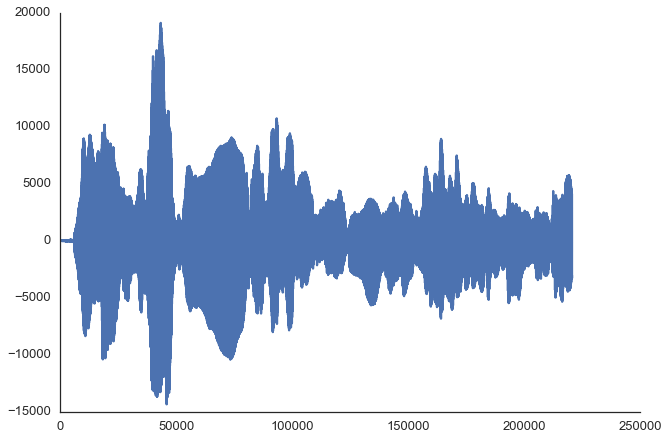

In [5]:
plt.plot(wave)
sns.despine()
Audio(data=wave, rate=framerate)

We can easily use array access and slicing to cut a segment from the audio data:

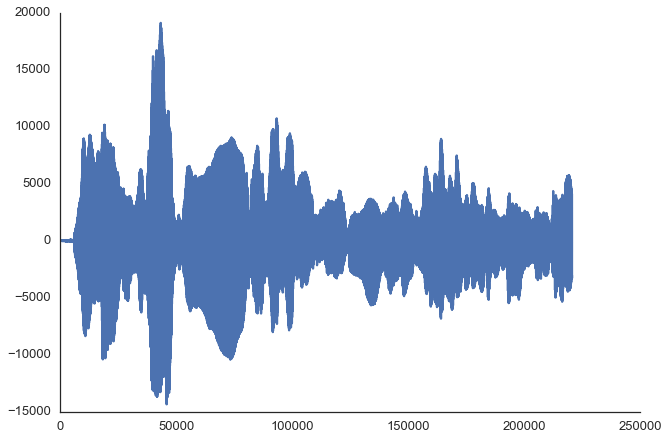

In [6]:
segment = wave[round(1.2 * framerate):round(1.8 * framerate)]
plt.plot(wave)
sns.despine()
Audio(data=segment, rate=framerate)

## FFT

Numpy has a [discrete FFT module](http://docs.scipy.org/doc/numpy/reference/routines.fft.html). We'll use it now:

In [7]:
spectrum = np.fft.rfft(wave)
freq = np.fft.fftfreq(spectrum.size, d=1/framerate)

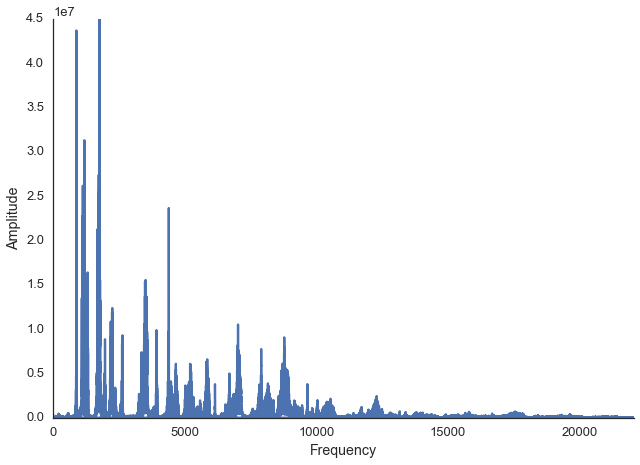

In [8]:
plt.plot(freq, np.abs(spectrum))
plt.xlim(0, framerate/2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
sns.despine()

## Exercise

Now we will apply a lowpass filter to cutoff frequencies higher than 3000, to emulate the effect of transmitting the audio on a telephone line. 

Complete the code below to implement the lowpass filter:

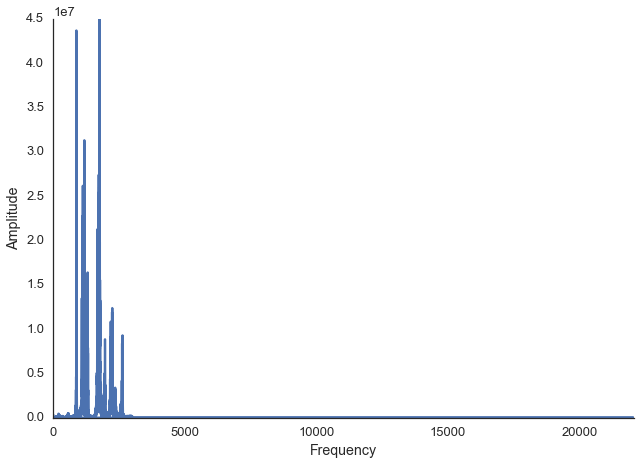

In [9]:
cutoff = 3000

# Your code here

plt.plot(freq, np.abs(spectrum))
plt.xlim(0, framerate/2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
sns.despine()

Now we'll do the reverse FFT to return to the time space. We also apply a normalization to return the signal to the range (-1, 1).

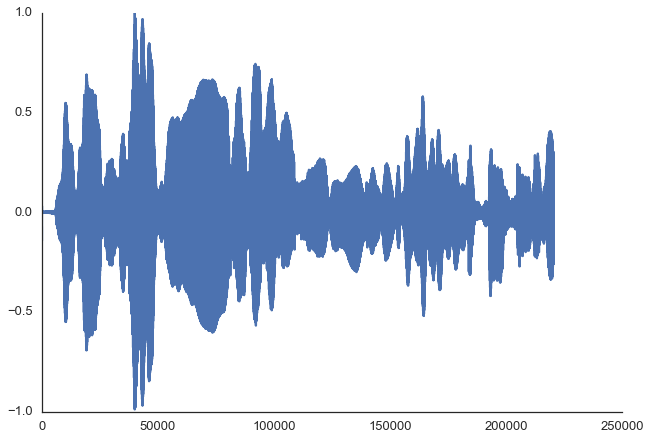

In [10]:
filtered = np.fft.irfft(spectrum)
high, low = abs(max(filtered)), abs(min(filtered))
normalized = filtered / max(high, low)

plt.plot(normalized)
sns.despine()
Audio(data=normalized, rate=framerate)

# `scipy.signal` module

Scipy has many functions for DSP in the [scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal) module, including MATLAB-style IIR filter design. 

In [11]:
with open_wave(r'../data/square.wav') as fp:
    nframes = fp.getnframes()
    nchannels = fp.getnchannels()
    framerate = fp.getframerate()    
    bytestring = fp.readframes(nframes)
    wave = np.fromstring(bytestring, dtype=np.int16)
print('Frame rate {2}, number of frames {0}, number of channels {1}'.format(nframes, nchannels, framerate))

Frame rate 44100, number of frames 44100, number of channels 1


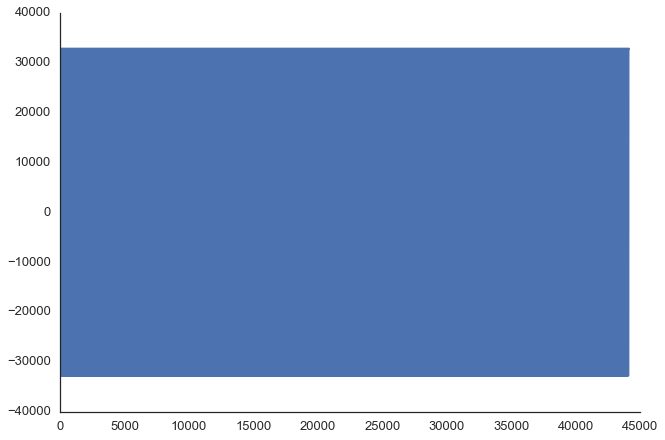

In [12]:
plt.plot(wave)
sns.despine()
Audio(data=wave, rate=framerate)

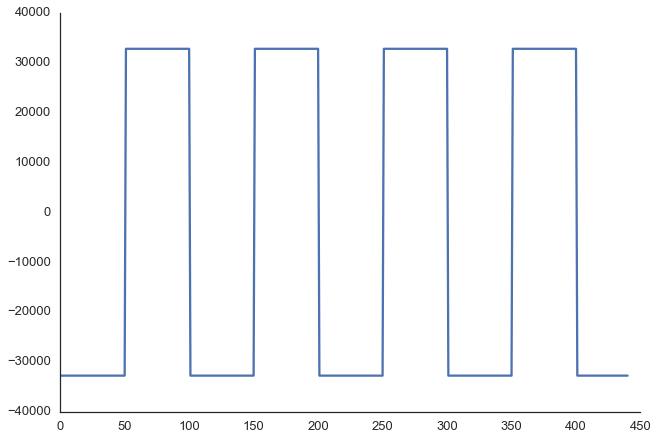

In [13]:
segment = wave[0:round(0.01*framerate)]
plt.plot(segment)
sns.despine()

Make a moving window:

In [14]:
window = np.ones(11)
window /= sum(window)

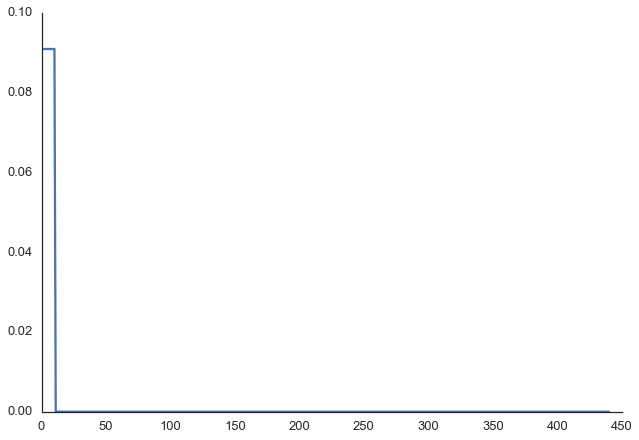

In [15]:
padded = np.zeros(len(segment))
padded[:len(window)] = window
plt.plot(padded)
sns.despine()

Apply a convolution using the window:

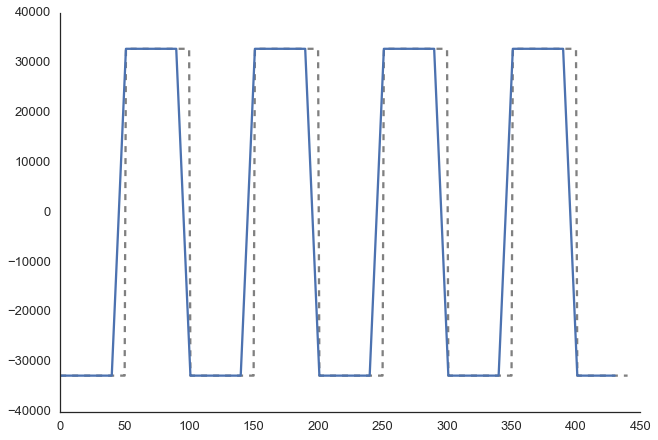

In [16]:
plt.plot(segment, ls='--', color='gray')
convolved = np.convolve(segment, window, mode='valid')
plt.plot(convolved)
sns.despine()

In [17]:
Audio(data=wave, rate=framerate)

In [18]:
convolved = np.convolve(wave, window, mode='valid')
Audio(data=convolved, rate=framerate)

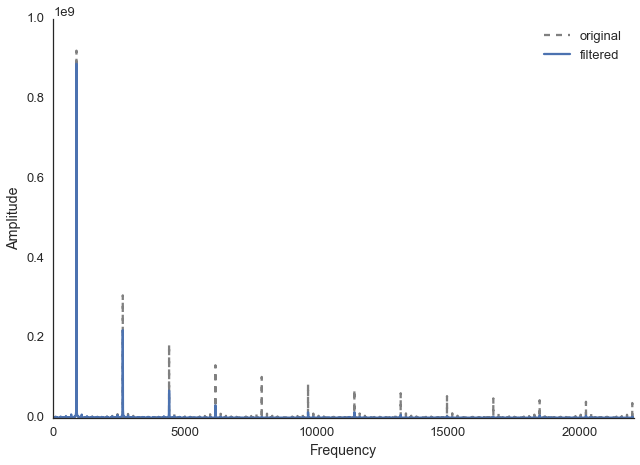

In [19]:
spectrum = np.fft.rfft(wave)
freq = np.fft.fftfreq(spectrum.size, d=1/framerate)
spectrum = spectrum[freq.argsort()]
freq.sort()

spectrum2 = np.fft.rfft(convolved)
freq2 = np.fft.fftfreq(spectrum2.size, d=1/framerate)
spectrum2 = spectrum2[freq2.argsort()]
freq2.sort()

plt.plot(freq, abs(spectrum), ls='--', color='gray', label='original')
plt.plot(freq2, abs(spectrum2), label='filtered')
plt.xlim(0, framerate/2)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
sns.despine()

# Solutions

- Lowpass filter: `spectrum[freq > cutoff] = 0`

# References

- [Think DSP](http://greenteapress.com/thinkdsp/) by Allen Downey

## Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Python for Engineers_](https://github.com/yoavram/Py4Eng) course.

The notebook was written using [Python](http://python.org/) 3.6.1.
Dependencies listed in [environment.yml](../environment.yml), full versions in [environment_full.yml](../environment_full.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)